In [1]:
# Importing required libraries
import requests
import json
import sqlite3
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from adjustText import adjust_text  # Library for text labels adjustment

### Fetching Json from API

In [2]:
# Step 1: Fetch JSON data
# prize
response1 = requests.get("https://api.nobelprize.org/v1/prize.json")
data1 = response1.json()
# laureate
response2 = requests.get("https://api.nobelprize.org/v1/laureate.json")
data2 = response2.json()

In [3]:
# Step 2: Parse JSON data
prize_data = data1['prizes']
laureate_data = data2['laureates']

In [4]:
# Read the JSON file
with open('prize_data.json') as f:
    prize_data = json.load(f)
# Read the JSON file
with open('laureate_data.json') as f:
    laureate_data = json.load(f)

### Creating SQLite Database

In [5]:
# Step 3: Create SQLite database schema
conn = sqlite3.connect('nobel_prizes.db')
cursor = conn.cursor()

### Creating Laureates table

In [6]:
# Step 4: Create database tables

# Create Laureates table
cursor.execute('''CREATE TABLE IF NOT EXISTS Laureates (
               id INTEGER PRIMARY KEY,
               firstname TEXT,
               surname TEXT,
               born DATE,
               died DATE,
               bornCountry TEXT,
               bornCountryCode TEXT,
               bornCity TEXT,
               diedCountry TEXT,
               diedCountryCode TEXT,
               diedCity TEXT,
               gender TEXT,
               affliation_id INTEGER
               )''')

### Inserting Values into Laureates table

In [7]:
for laureate in laureate_data:
    cursor.execute('''INSERT INTO Laureates VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?,?)''', 
                (laureate['id'],
                 laureate.get('firstname', None),
                 laureate.get('surname', None),
                 laureate.get('born', None),
                 laureate.get('died', None),
                 laureate.get('bornCountry', None),
                 laureate.get('bornCountryCode', None),
                 laureate.get('bornCity', None),
                 laureate.get('diedCountry', None),
                 laureate.get('diedCountryCode', None),
                 laureate.get('diedCity', None),
                 laureate.get('gender', None),
                None))

### SQL query to view Laureates table

In [8]:
# Execute SQL query to select all rows from Prizes table
cursor.execute('''SELECT * FROM Laureates LIMIT 5''')

# Fetch all rows
rows = cursor.fetchall()

# Print the rows
for row in rows:
    print(row)

(1, 'Wilhelm Conrad', 'Röntgen', '1845-03-27', '1923-02-10', 'Prussia (now Germany)', 'DE', 'Lennep (now Remscheid)', 'Germany', 'DE', 'Munich', 'male', None)
(2, 'Hendrik A.', 'Lorentz', '1853-07-18', '1928-02-04', 'the Netherlands', 'NL', 'Arnhem', 'the Netherlands', 'NL', None, 'male', None)
(3, 'Pieter', 'Zeeman', '1865-05-25', '1943-10-09', 'the Netherlands', 'NL', 'Zonnemaire', 'the Netherlands', 'NL', 'Amsterdam', 'male', None)
(4, 'Henri', 'Becquerel', '1852-12-15', '1908-08-25', 'France', 'FR', 'Paris', 'France', 'FR', None, 'male', None)
(5, 'Pierre', 'Curie', '1859-05-15', '1906-04-19', 'France', 'FR', 'Paris', 'France', 'FR', 'Paris', 'male', None)


### Creating Affiliations table

In [9]:
# Create Affiliations table
cursor.execute('''CREATE TABLE Affiliations (
               id INTEGER PRIMARY KEY AUTOINCREMENT,
               name TEXT,
               city TEXT,
               country TEXT
               )''')

### Inserting Values into Affiliations table

In [10]:
# Processes a list of laureate data to extract and print all affiliations associated with their prizes.

# Iterate through each laureate in the laureate data list
for item in laureate_data:
    # Access the 'prizes' list from each laureate's dictionary, if it exists
    for prize in item.get('prizes', []):
        # Retrieve the list of affiliations for each prize, default to an empty list if none exist
        affiliations = prize.get("affiliations", [])
        # Iterate through each affiliation in the list
        for affiliation in affiliations:
            # Print the affiliation details
            print(affiliation)

{'name': 'Munich University', 'city': 'Munich', 'country': 'Germany'}
{'name': 'Leiden University', 'city': 'Leiden', 'country': 'the Netherlands'}
{'name': 'Amsterdam University', 'city': 'Amsterdam', 'country': 'the Netherlands'}
{'name': 'École Polytechnique', 'city': 'Paris', 'country': 'France'}
{'name': 'École municipale de physique et de chimie industrielles (Municipal School of Industrial Physics and Chemistry)', 'city': 'Paris', 'country': 'France'}
[]
{'name': 'Sorbonne University', 'city': 'Paris', 'country': 'France'}
{'name': 'Royal Institution of Great Britain', 'city': 'London', 'country': 'United Kingdom'}
{'name': 'Kiel University', 'city': 'Kiel', 'country': 'Germany'}
{'name': 'University of Cambridge', 'city': 'Cambridge', 'country': 'United Kingdom'}
{'name': 'University of Chicago', 'city': 'Chicago, IL', 'country': 'USA'}
{'name': 'Sorbonne University', 'city': 'Paris', 'country': 'France'}
{'name': 'Marconi Wireless Telegraph Co. Ltd.', 'city': 'London', 'countr

In [11]:
# Processes a list of laureate data to extract and print a unique set of affiliations associated with their prizes.

# Initialize a set to store unique affiliations
unique_affiliations = set()

# Iterate over each laureate in the laureate data list
for item in laureate_data:
    # Access the 'prizes' list for each laureate, defaulting to an empty list if none exist
    for prize in item.get('prizes', []):
        # Retrieve the list of affiliations for each prize, default to an empty list if none exist
        affiliations = prize.get("affiliations", [])
        # Iterate through each affiliation
        for affiliation in affiliations:
            # Ensure that the affiliation is not None or empty
            if affiliation:
                # Convert the affiliation dictionary to a tuple of its items for immutability
                affiliation_tuple = tuple(affiliation.items())
                # Add the immutable tuple to the set of unique affiliations
                unique_affiliations.add(affiliation_tuple)

# Iterate over the set of unique affiliations
for affiliation_tuple in unique_affiliations:
    # Convert each tuple back into a dictionary
    affiliation_dict = dict(affiliation_tuple)
    # Print the affiliation dictionary; print "None" if the dictionary is empty
    print(affiliation_dict if affiliation_dict else "None")

{'name': 'École Supérieure de Physique et Chimie', 'city': 'Paris', 'country': 'France'}
{'name': 'Drew University', 'city': 'Madison, NJ', 'country': 'USA'}
{'name': 'Universit&eacute; Paris-Sud', 'city': 'Orsay', 'country': 'France'}
{'name': 'Francis Crick Institute', 'city': 'London', 'country': 'United Kingdom'}
{'name': 'Sheffield University', 'city': 'Sheffield', 'country': 'United Kingdom'}
{'name': 'Massachusetts General Hospital', 'city': 'Boston, MA', 'country': 'USA'}
{'name': 'Vanderbilt University School of Medicine', 'city': 'Nashville, TN', 'country': 'USA'}
{'name': 'National Institute for Medical Research', 'city': 'London', 'country': 'United Kingdom'}
{'name': 'Uppsala University', 'city': 'Uppsala', 'country': 'Sweden'}
{'name': 'Université Louis Pasteur', 'city': 'Strasbourg', 'country': 'France'}
{'name': 'Max Planck Institute for Extraterrestrial Physics', 'city': 'Garching', 'country': 'Germany'}
{'name': 'Max-Planck-Institut für Festkörperforschung', 'city': '

In [12]:
# Extracts unique affiliations from laureate prize data and inserts them into a database table.

# Initialize a set to store unique affiliation tuples
unique_affiliations = set()

# Iterate over each laureate in the laureate data list
for item in laureate_data:
    for prize in item.get('prizes', []):  # Access the 'prizes' key, defaulting to an empty list if not found
        affiliations = prize.get("affiliations", [])  # Retrieve affiliations list, default to empty if none
        if not affiliations:  # Check if the affiliations list is empty
            unique_affiliations.add(None)  # Add a None type for laureates with no affiliations
        else:
            for affiliation in affiliations:  # Iterate through each affiliation
                if affiliation:  # Check if the current affiliation is not empty
                    # Convert the affiliation dictionary to a tuple of its items for hashability
                    affiliation_tuple = tuple(affiliation.items())
                    unique_affiliations.add(affiliation_tuple)  # Add unique affiliation tuple to the set
                else:
                    unique_affiliations.add(None)  # Add None for empty affiliation entries

# Insert unique affiliations into the 'Affiliations' table in the database
for affiliation in unique_affiliations:
    if affiliation is None:
        # Handle the case where affiliation is None by inserting 'Unknown' or similar placeholders
        cursor.execute("INSERT INTO Affiliations (name, city, country) VALUES (?, ?, ?)", ('Unknown', None, None))
    else:
        # Convert each tuple back to a dictionary
        affiliation_dict = dict(affiliation)
        # Extract values from the dictionary, defaulting to None if key not found
        name = affiliation_dict.get('name', None)
        city = affiliation_dict.get('city', None)
        country = affiliation_dict.get('country', None)
        # Execute SQL command to insert data into the database
        cursor.execute("INSERT INTO Affiliations (name, city, country) VALUES (?, ?, ?)", (name, city, country))

In [13]:
# Insert a default affiliation entry into a database

# Define the default values for name, city, and country
name = 'Unknown'
city = 'Unknown'
country = 'Unknown'

# Execute SQL query to insert a row into the Affiliations table
cursor.execute('''
    INSERT INTO Affiliations (name, city, country)
    VALUES (?, ?, ?)
''', (name, city, country))

# Print a confirmation message indicating successful addition
print("Row added successfully.")

Row added successfully.


### SQL query to view Affiliations table

In [14]:
# Execute SQL query to select all rows from Prizes table
cursor.execute('''SELECT * FROM Affiliations ORDER BY id LIMIT 5''')

# Fetch all rows
rows = cursor.fetchall()

# Print the rows
for row in rows:
    print(row)

(1, 'École Supérieure de Physique et Chimie', 'Paris', 'France')
(2, 'Drew University', 'Madison, NJ', 'USA')
(3, 'Universit&eacute; Paris-Sud', 'Orsay', 'France')
(4, 'Francis Crick Institute', 'London', 'United Kingdom')
(5, 'Sheffield University', 'Sheffield', 'United Kingdom')


### Creating Prize table

In [15]:
# Create Prizes table
cursor.execute('''CREATE TABLE Prizes (
               id INTEGER PRIMARY KEY AUTOINCREMENT,
               year INTEGER,
               category TEXT,
               share INTEGER,
               motivation TEXT,
               laureate_id1 INTEGER,
               laureate_id1_gender TEXT,
               laureate_id2 INTEGER,
               laureate_id2_gender TEXT,
               laureate_id3 INTEGER,
               laureate_id3_gender TEXT
               )''')

### Inserting Values into Prize table

In [16]:
# Matche prize data from a provided list with a set of laureate data, then inserts the matched prize details into the database.

# Iterate through each prize entry in the provided prize data list
for prize in prize_data:
    # Access the database-assigned ID of the last row inserted
    prize_id = cursor.lastrowid
    # Retrieve the year and category of the prize, defaulting to None if not present
    year = prize.get('year', None)
    category = prize.get('category', None)
    # Define a dictionary for matching year and category in the laureate data
    pairs_to_match = {'year': year, 'category': category}

    # Initialize a variable to store the matched prize
    new_prize = None
    # Loop through each item in the laureate data
    for item in laureate_data:
        # Access each prize in the 'prizes' list within the laureate's data
        for prize in item.get('prizes', []):
            # Match the prize based on year and category
            if all(prize.get(key) == value for key, value in pairs_to_match.items()):
                new_prize = prize
                break
        # Break out of the outer loop once a match is found
        if new_prize:
            break

    # Retrieve the share and motivation from the matched prize, handling missing data
    share = new_prize.get('share', None) if new_prize else None
    motivation = new_prize.get('motivation', 'None') if new_prize else 'None'

    # Insert the matched prize details into the Prizes table in the database
    cursor.execute("INSERT INTO Prizes (year, category, share, motivation) VALUES (?, ?, ?, ?)", (year, category, share, motivation))

### SQL query to view Prizes table

In [17]:
# Execute SQL query to select all rows from Prizes table
cursor.execute('''SELECT * FROM Prizes LIMIT 5''')

# Fetch all rows
rows = cursor.fetchall()

# Print the rows
for row in rows:
    print(row)

(1, 2023, 'chemistry', 3, '"for the discovery and synthesis of quantum dots"', None, None, None, None, None, None)
(2, 2023, 'economics', 1, '"for having advanced our understanding of women’s labour market outcomes"', None, None, None, None, None, None)
(3, 2023, 'literature', 1, '"for his innovative plays and prose which give voice to the unsayable"', None, None, None, None, None, None)
(4, 2023, 'peace', 1, '"for her fight against the oppression of women in Iran and her fight to promote human rights and freedom for all"', None, None, None, None, None, None)
(5, 2023, 'physics', 3, '"for experimental methods that generate attosecond pulses of light for the study of electron dynamics in matter"', None, None, None, None, None, None)


In [18]:
# Update the laureate entries in the database with affiliation IDs based on matching records from the Affiliations table. 
# If no valid affiliations are found, default 'unknown' affiliation is used.

# Default affiliation ID for cases where no valid affiliation is found
default_affiliation_id = 372

# Iterate through each laureate in the list of laureate data
for item in laureate_data:
    item_id = item.get('id')  # Retrieve the laureate's ID
    has_valid_affiliation = False  # Initialize flag to check for valid affiliations

    # Iterate through each prize associated with the laureate
    for prize in item.get('prizes', []):
        affiliations = prize.get("affiliations", [])  # Retrieve affiliations for the prize
        
        # Iterate through each affiliation of the prize
        for affiliation in affiliations:
            if affiliation:
                # Extract affiliation details
                name = affiliation.get('name')
                country = affiliation.get('country')
                city = affiliation.get('city')

                # Check if the extracted details are complete
                if name and country and city:
                    has_valid_affiliation = True  # Set flag to True as a valid affiliation is found
                    # Query the database to find the affiliation ID
                    cursor.execute('''SELECT id FROM Affiliations WHERE name=? AND country=? AND city=?''', (name, country, city))
                    rows = cursor.fetchall()
                    if rows:  # If the query returns rows, retrieve the first row's ID
                        aff_id = rows[0][0]
                        break  # Break the inner loop on finding the first valid affiliation

        # Update the laureate's record with the found affiliation ID if valid affiliation exists
        if has_valid_affiliation:
            cursor.execute('''UPDATE Laureates SET affliation_id=? WHERE id=?''', (aff_id, item_id))
            conn.commit()  # Commit the changes to the database
            break  # Break the outer loop as we only need one valid affiliation per laureate

    # If no valid affiliation was found after checking all, use the default affiliation ID
    if not has_valid_affiliation:
        cursor.execute('''UPDATE Laureates SET affliation_id=? WHERE id=?''', (default_affiliation_id, item_id))

In [19]:
# Updates the Prizes table with laureate IDs and their genders for each prize based on year and category.

# Iterate through each item in prize data
for item in prize_data:
    # Extract year and category for the prize
    year = item.get('year', None)
    category = item.get('category', None)
    # Retrieve list of laureates associated with the prize
    laureates = item.get('laureates', [])
    
    # List to hold tuples of laureate IDs and their genders
    laureate_info = []
    # Fetch each laureate's gender from the Laureates table using laureate ID
    for laureate in laureates:
        laureate_id = laureate.get('id', None)
        if laureate_id:
            # Execute SQL query to fetch gender of the laureate
            cursor.execute("SELECT gender FROM Laureates WHERE id=?", (laureate_id,))
            result = cursor.fetchone()  # Fetch the result from the query
            # Retrieve gender from the query result, or set to None if no result found
            laureate_gender = result[0] if result else None
            # Append the laureate ID and gender as a tuple to the list
            laureate_info.append((laureate_id, laureate_gender))
    
    # Update the Prizes table with the laureate information
    # Iterate through the laureate_info list with enumeration to track the index
    for i, info in enumerate(laureate_info, start=1):
        laureate_id, laureate_gender = info
        # Depending on the index, update the appropriate laureate_id and gender fields in the Prizes table
        if i == 1:
            cursor.execute('''UPDATE Prizes SET laureate_id1=?, laureate_id1_gender=? WHERE year=? AND category=?''', 
                           (laureate_id, laureate_gender, year, category))
        elif i == 2:
            cursor.execute('''UPDATE Prizes SET laureate_id2=?, laureate_id2_gender=? WHERE year=? AND category=?''', 
                           (laureate_id, laureate_gender, year, category))
        elif i == 3:
            cursor.execute('''UPDATE Prizes SET laureate_id3=?, laureate_id3_gender=? WHERE year=? AND category=?''', 
                           (laureate_id, laureate_gender, year, category))

In [20]:
# Execute SQL query to select all rows from Prizes table
cursor.execute('''SELECT * FROM Prizes LIMIT 5''')

# Fetch all rows
rows = cursor.fetchall()

# Print the rows
for row in rows:
    print(row)

(1, 2023, 'chemistry', 3, '"for the discovery and synthesis of quantum dots"', 1029, 'male', 1030, 'male', 1031, 'male')
(2, 2023, 'economics', 1, '"for having advanced our understanding of women’s labour market outcomes"', 1034, 'female', None, None, None, None)
(3, 2023, 'literature', 1, '"for his innovative plays and prose which give voice to the unsayable"', 1032, 'male', None, None, None, None)
(4, 2023, 'peace', 1, '"for her fight against the oppression of women in Iran and her fight to promote human rights and freedom for all"', 1033, 'female', None, None, None, None)
(5, 2023, 'physics', 3, '"for experimental methods that generate attosecond pulses of light for the study of electron dynamics in matter"', 1026, 'male', 1027, 'male', 1028, 'female')


#### Add a new column Age to the Prizes table

In [21]:
# Add a new column Age to the Prizes table
cursor.execute('''ALTER TABLE Prizes ADD COLUMN Age_Laureate1 INTEGER''')
cursor.execute('''ALTER TABLE Prizes ADD COLUMN Age_Laureate2 INTEGER''')
cursor.execute('''ALTER TABLE Prizes ADD COLUMN Age_Laureate3 INTEGER''')

# Calculate age for each laureate and update the Age columns
cursor.execute('''UPDATE Prizes 
                  SET Age_Laureate1 = (SELECT year - strftime('%Y', born) 
                              FROM Laureates 
                              WHERE Prizes.laureate_id1 = Laureates.id),
                      Age_Laureate2 = (SELECT year - strftime('%Y', born) 
                              FROM Laureates 
                              WHERE Prizes.laureate_id2 = Laureates.id),
                      Age_Laureate3 = (SELECT year - strftime('%Y', born) 
                              FROM Laureates 
                              WHERE Prizes.laureate_id3 = Laureates.id)''')
# Execute a query to select top 5 records to verify the addition of the Age column
cursor.execute('''SELECT * FROM Prizes LIMIT 5''')

# Fetch and print the results
rows = cursor.fetchall()
for row in rows:
    print(row)

(1, 2023, 'chemistry', 3, '"for the discovery and synthesis of quantum dots"', 1029, 'male', 1030, 'male', 1031, 'male', None, None, None)
(2, 2023, 'economics', 1, '"for having advanced our understanding of women’s labour market outcomes"', 1034, 'female', None, None, None, None, None, None, None)
(3, 2023, 'literature', 1, '"for his innovative plays and prose which give voice to the unsayable"', 1032, 'male', None, None, None, None, 64, None, None)
(4, 2023, 'peace', 1, '"for her fight against the oppression of women in Iran and her fight to promote human rights and freedom for all"', 1033, 'female', None, None, None, None, 51, None, None)
(5, 2023, 'physics', 3, '"for experimental methods that generate attosecond pulses of light for the study of electron dynamics in matter"', 1026, 'male', 1027, 'male', 1028, 'female', 82, 61, 65)


#### Add new columns for the Birth Country to the Prizes table

In [22]:
# Add new columns for the birth country of each laureate ID to the Prizes table
cursor.execute('''ALTER TABLE Prizes ADD COLUMN laureate_id1_bornCountry TEXT''')
cursor.execute('''ALTER TABLE Prizes ADD COLUMN laureate_id2_bornCountry TEXT''')
cursor.execute('''ALTER TABLE Prizes ADD COLUMN laureate_id3_bornCountry TEXT''')

# Update the born country of each laureate into the prize table
cursor.execute('''
    UPDATE Prizes
    SET laureate_id1_bornCountry = (SELECT bornCountry FROM Laureates WHERE Prizes.laureate_id1 = Laureates.id),
        laureate_id2_bornCountry = (SELECT bornCountry FROM Laureates WHERE Prizes.laureate_id2 = Laureates.id),
        laureate_id3_bornCountry = (SELECT bornCountry FROM Laureates WHERE Prizes.laureate_id3 = Laureates.id)
''')

# Execute a query to select top 5 records to verify the addition of the Age column
cursor.execute('''SELECT * FROM Prizes LIMIT 5''')

# Fetch and print the results
rows = cursor.fetchall()
for row in rows:
    print(row)

(1, 2023, 'chemistry', 3, '"for the discovery and synthesis of quantum dots"', 1029, 'male', 1030, 'male', 1031, 'male', None, None, None, 'France', 'USA', 'USSR (now Russia)')
(2, 2023, 'economics', 1, '"for having advanced our understanding of women’s labour market outcomes"', 1034, 'female', None, None, None, None, None, None, None, 'USA', None, None)
(3, 2023, 'literature', 1, '"for his innovative plays and prose which give voice to the unsayable"', 1032, 'male', None, None, None, None, 64, None, None, 'Norway', None, None)
(4, 2023, 'peace', 1, '"for her fight against the oppression of women in Iran and her fight to promote human rights and freedom for all"', 1033, 'female', None, None, None, None, 51, None, None, 'Iran', None, None)
(5, 2023, 'physics', 3, '"for experimental methods that generate attosecond pulses of light for the study of electron dynamics in matter"', 1026, 'male', 1027, 'male', 1028, 'female', 82, 61, 65, 'French protectorate of Tunisia (now Tunisia)', 'Hungar

#### Add new columns for the Birth City to the Prizes table

In [23]:
# Add new columns for the birth city of each laureate ID to the Prizes table
cursor.execute('''ALTER TABLE Prizes ADD COLUMN laureate_id1_bornCity TEXT''')
cursor.execute('''ALTER TABLE Prizes ADD COLUMN laureate_id2_bornCity TEXT''')
cursor.execute('''ALTER TABLE Prizes ADD COLUMN laureate_id3_bornCity TEXT''')

# Update the born city of each laureate into the prize table
cursor.execute('''
    UPDATE Prizes
    SET laureate_id1_bornCity = (SELECT bornCity FROM Laureates WHERE Prizes.laureate_id1 = Laureates.id),
        laureate_id2_bornCity = (SELECT bornCity FROM Laureates WHERE Prizes.laureate_id2 = Laureates.id),
        laureate_id3_bornCity = (SELECT bornCity FROM Laureates WHERE Prizes.laureate_id3 = Laureates.id)
''')

# Execute a query to select top 5 records to verify the addition of the city column
cursor.execute('''SELECT * FROM Prizes LIMIT 5''')

# Fetch and print the results
rows = cursor.fetchall()
for row in rows:
    print(row)

(1, 2023, 'chemistry', 3, '"for the discovery and synthesis of quantum dots"', 1029, 'male', 1030, 'male', 1031, 'male', None, None, None, 'France', 'USA', 'USSR (now Russia)', 'Paris', 'Cleveland, OH', 'Leningrad (now St. Petersburg)')
(2, 2023, 'economics', 1, '"for having advanced our understanding of women’s labour market outcomes"', 1034, 'female', None, None, None, None, None, None, None, 'USA', None, None, 'New York, NY', None, None)
(3, 2023, 'literature', 1, '"for his innovative plays and prose which give voice to the unsayable"', 1032, 'male', None, None, None, None, 64, None, None, 'Norway', None, None, 'Haugesund', None, None)
(4, 2023, 'peace', 1, '"for her fight against the oppression of women in Iran and her fight to promote human rights and freedom for all"', 1033, 'female', None, None, None, None, 51, None, None, 'Iran', None, None, 'Zanjan', None, None)
(5, 2023, 'physics', 3, '"for experimental methods that generate attosecond pulses of light for the study of electro

#### Add new columns for the Affiliation details to the Prizes table

In [24]:
# Adding new columns for laureate affiliation details to the Prizes table.
cursor.execute('''ALTER TABLE Prizes ADD COLUMN laureate_id1_affiliation_name TEXT''')
cursor.execute('''ALTER TABLE Prizes ADD COLUMN laureate_id1_affiliation_city TEXT''')
cursor.execute('''ALTER TABLE Prizes ADD COLUMN laureate_id1_affiliation_country TEXT''')
cursor.execute('''ALTER TABLE Prizes ADD COLUMN laureate_id2_affiliation_name TEXT''')
cursor.execute('''ALTER TABLE Prizes ADD COLUMN laureate_id2_affiliation_city TEXT''')
cursor.execute('''ALTER TABLE Prizes ADD COLUMN laureate_id2_affiliation_country TEXT''')
cursor.execute('''ALTER TABLE Prizes ADD COLUMN laureate_id3_affiliation_name TEXT''')
cursor.execute('''ALTER TABLE Prizes ADD COLUMN laureate_id3_affiliation_city TEXT''')
cursor.execute('''ALTER TABLE Prizes ADD COLUMN laureate_id3_affiliation_country TEXT''')

# Update the newly added columns with affiliation details for up to three laureates per prize.
# COALESCE is used to handle cases where there may not be an affiliation record, defaulting to 'None'.
cursor.execute('''
    UPDATE Prizes
    SET 
        laureate_id1_affiliation_name = COALESCE((SELECT name FROM Affiliations JOIN Laureates ON Laureates.affliation_id = Affiliations.id WHERE Laureates.id = Prizes.laureate_id1), 'None'),
        laureate_id1_affiliation_city = COALESCE((SELECT city FROM Affiliations JOIN Laureates ON Laureates.affliation_id = Affiliations.id WHERE Laureates.id = Prizes.laureate_id1), 'None'),
        laureate_id1_affiliation_country = COALESCE((SELECT country FROM Affiliations JOIN Laureates ON Laureates.affliation_id = Affiliations.id WHERE Laureates.id = Prizes.laureate_id1), 'None'),

        laureate_id2_affiliation_name = COALESCE((SELECT name FROM Affiliations JOIN Laureates ON Laureates.affliation_id = Affiliations.id WHERE Laureates.id = Prizes.laureate_id2), 'None'),
        laureate_id2_affiliation_city = COALESCE((SELECT city FROM Affiliations JOIN Laureates ON Laureates.affliation_id = Affiliations.id WHERE Laureates.id = Prizes.laureate_id2), 'None'),
        laureate_id2_affiliation_country = COALESCE((SELECT country FROM Affiliations JOIN Laureates ON Laureates.affliation_id = Affiliations.id WHERE Laureates.id = Prizes.laureate_id2), 'None'),

        laureate_id3_affiliation_name = COALESCE((SELECT name FROM Affiliations JOIN Laureates ON Laureates.affliation_id = Affiliations.id WHERE Laureates.id = Prizes.laureate_id3), 'None'),
        laureate_id3_affiliation_city = COALESCE((SELECT city FROM Affiliations JOIN Laureates ON Laureates.affliation_id = Affiliations.id WHERE Laureates.id = Prizes.laureate_id3), 'None'),
        laureate_id3_affiliation_country = COALESCE((SELECT country FROM Affiliations JOIN Laureates ON Laureates.affliation_id = Affiliations.id WHERE Laureates.id = Prizes.laureate_id3), 'None')
''')

# Fetch and display the top 5 records from the Prizes table to verify the updates.
cursor.execute('''SELECT * FROM Prizes LIMIT 5''')
rows = cursor.fetchall()
for row in rows:
    print(row)

(1, 2023, 'chemistry', 3, '"for the discovery and synthesis of quantum dots"', 1029, 'male', 1030, 'male', 1031, 'male', None, None, None, 'France', 'USA', 'USSR (now Russia)', 'Paris', 'Cleveland, OH', 'Leningrad (now St. Petersburg)', 'Massachusetts Institute of Technology (MIT)', 'Cambridge, MA', 'USA', 'Columbia University', 'New York, NY', 'USA', 'Nanocrystals Technology Inc.', 'New York, NY', 'USA')
(2, 2023, 'economics', 1, '"for having advanced our understanding of women’s labour market outcomes"', 1034, 'female', None, None, None, None, None, None, None, 'USA', None, None, 'New York, NY', None, None, 'Harvard University', 'Cambridge, MA', 'USA', 'None', 'None', 'None', 'None', 'None', 'None')
(3, 2023, 'literature', 1, '"for his innovative plays and prose which give voice to the unsayable"', 1032, 'male', None, None, None, None, 64, None, None, 'Norway', None, None, 'Haugesund', None, None, 'Unknown', 'Unknown', 'Unknown', 'None', 'None', 'None', 'None', 'None', 'None')
(4, 20

## OVERVIEW OF NOBEL LAUREATES BY GENDER AND CATEGORY

This section offers a comprehensive overview of the Nobel Prizes granted across various categories, with a focus on the gender distribution among the laureates. Analyzing the number and proportion of awards conferred upon male and female achievers in each category gives valuable insights into gender representation in these prestigious prizes.

#### QUERY 1: COUNT OF LAUREATES IN EACH CATEGORY

The query analyzes the distribution of Nobel Prize laureates across different categories, providing information on the number of laureates awarded in each category.

In [25]:
# Query to count the number of Nobel Prize laureates in each category, 
# create a DataFrame from the results, sort it, and display the sorted counts.

# Execute SQL query to count laureates in each prize category
cursor.execute('''
SELECT category, COUNT(*) AS count
FROM Prizes
JOIN Laureates
ON Prizes.laureate_id1 = Laureates.id
OR Prizes.laureate_id2 = Laureates.id
OR Prizes.laureate_id3 = Laureates.id
GROUP BY category 
''')

results = cursor.fetchall()

# Create a DataFrame from the query results with appropriate column names
df = pd.DataFrame(results, columns=['Category', 'Count'])

# Sort the DataFrame by 'Count' in descending order to see the most populous categories first
df = df.sort_values(by='Count', ascending=False)

# Display the DataFrame
print("Count of Laureates in each category")
df

Count of Laureates in each category


,Category,Count
3,medicine,227
5,physics,225
0,chemistry,194
4,peace,141
2,literature,120
1,economics,93


####  Query 1: Visualisation 

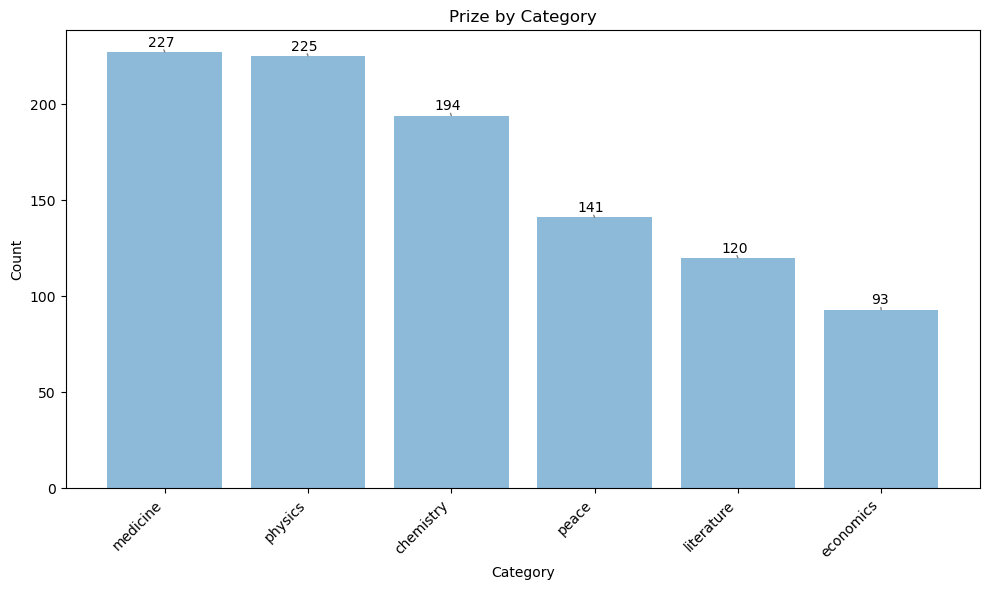

In [26]:
plt.figure(figsize=(10, 6))

# Create a bar plot with 'Category' as the x-axis and 'Count' as the y-axis
bars = plt.bar(df['Category'], df['Count'], alpha=0.5)
plt.xticks(rotation=45, ha='right')

# Set the x and y-axis labels
plt.xlabel('Category')
plt.ylabel('Count')

plt.title('Prize by Category')  # the title of the plot

# Add count labels above each bar 
texts = [plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(bar.get_height())),
                  ha='center', va='bottom') for bar in bars]

# Adjust the position of labels
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray'))
plt.tight_layout()
plt.show()

#### Insight from Visualisation
- The bar graph displays the Nobel Prize distribution across six categories: Medicine, Physics, Chemistry, Peace, Literature, and Economics.
- Medicine and Physics have the most prizes awarded, indicating a significant focus on advancements in these areas.

#### QUERY 2: COUNT OF MALE AND FEMALE LAUREATES

This query counts the number of Nobel Prize laureates by gender, showing the distribution of prizes between male and female recipients. It provides insight into gender representation among Nobel laureates.

In [27]:
# Query to count Nobel Prize laureates by gender, and present the counts

# Execute SQL query to count laureates grouped by gender
cursor.execute('''
SELECT gender, COUNT(*) AS count
FROM Laureates
GROUP BY gender;
''')

results = cursor.fetchall()

# Convert the query results into a DataFrame with specified column names
df = pd.DataFrame(results, columns=['Gender', 'Count'])

# Display the DataFrame showing counts of male and female laureates
print("Count of Male and Female Laureates")
df

Count of Male and Female Laureates


,Gender,Count
0,female,64
1,male,901
2,org,27


#### Query 2: Visualisation 

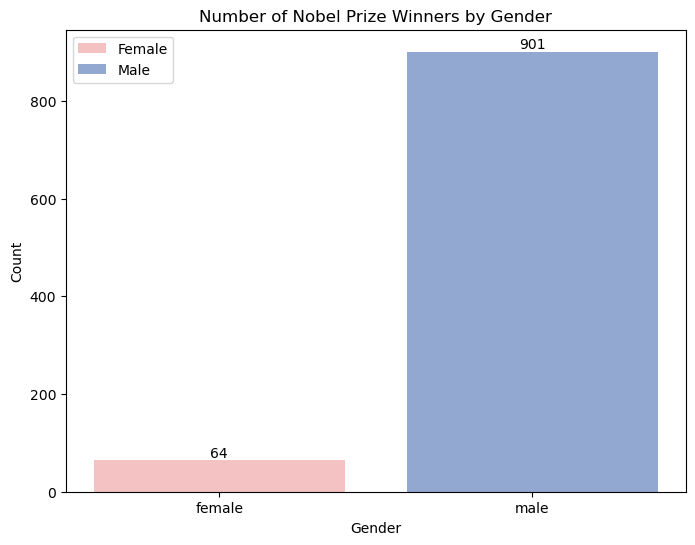

In [28]:
filtered_results = [row for row in results if row[0] != 'org']  # Filter out rows where gender is 'org'
genders = [row[0] for row in filtered_results]  # List of genders (excluding 'org')
counts = [row[1] for row in filtered_results]  # Corresponding counts of each gender

plt.figure(figsize=(8, 6))

bars = plt.bar(genders, counts, color=['#f4c2c2', '#92a8d1']) 
plt.legend(bars, ['Female', 'Male'])  # Legend

# Label the x-axis and y-axis
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Number of Nobel Prize Winners by Gender')  # Title to the plot

# Adding text labels to show the count of laureates
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count,
             ha='center', va='bottom', color='black')  
plt.show()

#### Insight from Visualisation
- The bar graph shows a large gap between the number of male (901) and female (64) Nobel Prize winners, indicating a significant gender disparity.

#### QUERY 3: COUNT OF MALE AND FEMALE LAUREATES IN EACH CATEGORY

This query shows the number of male and female Nobel Prize laureates in each category (such as Physics, Chemistry, Peace, etc.). It helps determine gender representation in different fields.

In [29]:
# Query to count of male and female Nobel Prize winners grouped by prize category.
# filters out organizations and presents the data.

# Query to count the number of male and female laureates per category
cursor.execute('''
SELECT category, gender, COUNT(*) AS count
FROM Prizes
JOIN Laureates
ON Prizes.laureate_id1 = Laureates.id
OR Prizes.laureate_id2 = Laureates.id
OR Prizes.laureate_id3 = Laureates.id
WHERE gender IS NOT NULL
GROUP BY category, gender
''')

results = cursor.fetchall()

df = pd.DataFrame(results, columns=['Category', 'Gender', 'Count'])    # DataFrame from the fetched rows with specified column names
df = df[df['Gender'] != 'org']   # Filter out entries where the gender is 'org'

# DataFrame showing counts of male and female laureates in each category
print("Count of Male and Female Laureates in each Category")
df

Count of Male and Female Laureates in each Category


,Category,Gender,Count
0,chemistry,female,8
1,chemistry,male,186
2,economics,female,3
3,economics,male,90
4,literature,female,17
5,literature,male,103
6,medicine,female,13
7,medicine,male,214
8,peace,female,19
9,peace,male,92


#### Query 3: Visualisation 

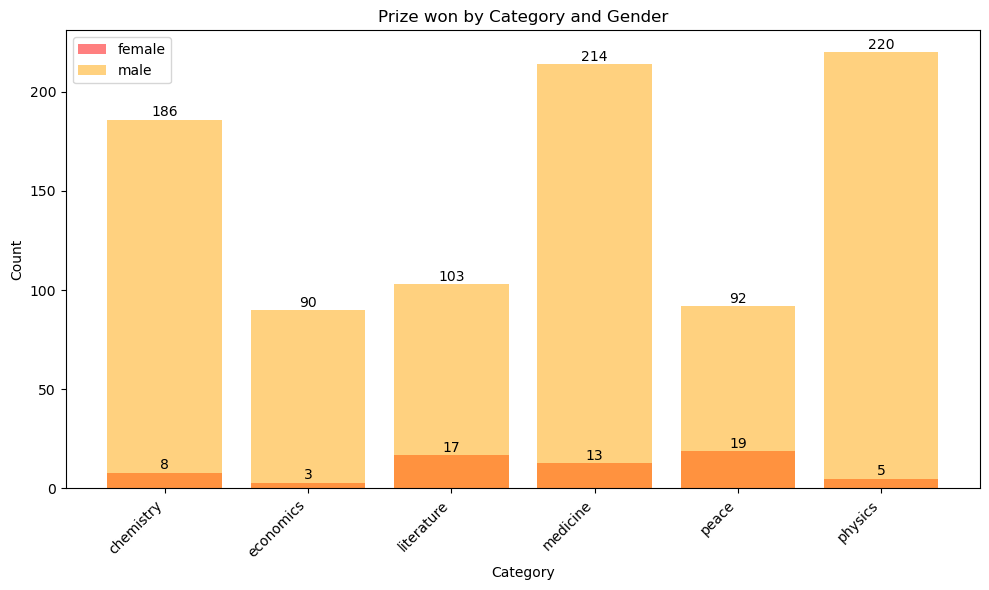

In [30]:
# Plot
plt.figure(figsize=(10, 6))
colors = {'male': 'orange', 'female': 'red'}

# Loop through each unique gender found in the DataFrame
for gender in df['Gender'].unique():
    # Filter data for the current gender
    data = df[df['Gender'] == gender]
    plt.bar(data['Category'], 
            data['Count'], 
            label=gender,  # Label for the legend
            alpha=0.5,  
            color=colors[gender])  # Color according to the gender

    for i, count in enumerate(data['Count']):
        plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

# Label the x-axis and y-axis
plt.xlabel('Category')
plt.ylabel('Count')

plt.title('Prize won by Category and Gender')   # Title to the chart
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

#### Insight from Visualisation
- The bar chart shows Nobel Prizes awarded by category and gender. 
- It reveals that males have received significantly more awards than females in each category.

## GENDER PERSPECTIVES

This section provides an in-depth analysis of the gender dynamics observed in the Nobel Prizes over time. It aims to explore the evolution of the percentage of male and female laureates across various categories. This examination gives valuable insights into the trends, progress, and differences in gender representation among Nobel Prize winners. The findings obtained from this analysis can be instrumental in shedding light on the current state of gender diversity in the field, and aid in making informed decisions to promote equity and inclusion.

#### QUERY 4: PERCENTAGE OF FEMALE LAUREATES OVER THE YEARS FOR EACH CATEGORY

This query analyzes the percentage of female Nobel laureates in each prize category over the decades. It provides insights into the changing landscape of gender representation in various fields recognized by the Nobel Prizes.

In [31]:
# This script calculates and displays the percentage of female Nobel Prize winners by decade and category.

# Execute SQL query to compute the proportion of female winners by decade and category
cursor.execute('''
SELECT CAST((Year / 10) * 10 AS INTEGER) AS decade, Category,
       AVG(CASE WHEN gender = 'female' THEN 1 ELSE 0 END) AS fproportion
FROM (
    SELECT Year, Category, gender
    FROM Prizes
    JOIN Laureates ON Prizes.laureate_id1 = Laureates.id
                   OR Prizes.laureate_id2 = Laureates.id
                   OR Prizes.laureate_id3 = Laureates.id
)
GROUP BY decade, Category;
''')

results = cursor.fetchall()

# Create a DataFrame from the fetched rows with specific column names
df = pd.DataFrame(results, columns=['decade', 'Category', 'fproportion'])

# Filter out rows where the proportion of female winners is not calculated (null values)
df_female = df[df['fproportion'].notnull()]

# Display the DataFrame which shows the percentage of female winners by decade and category
print("Percentage of Female Winners by Decade and Category")
df_female  

Percentage of Female Winners by Decade and Category


,decade,Category,fproportion
0,1900,chemistry,0.000000
1,1900,literature,0.100000
2,1900,medicine,0.000000
3,1900,peace,0.071429
4,1900,physics,0.076923
...,...,...,...
67,2020,economics,0.111111
68,2020,literature,0.500000
69,2020,medicine,0.125000
70,2020,peace,0.285714


#### Query 4: Visualisation

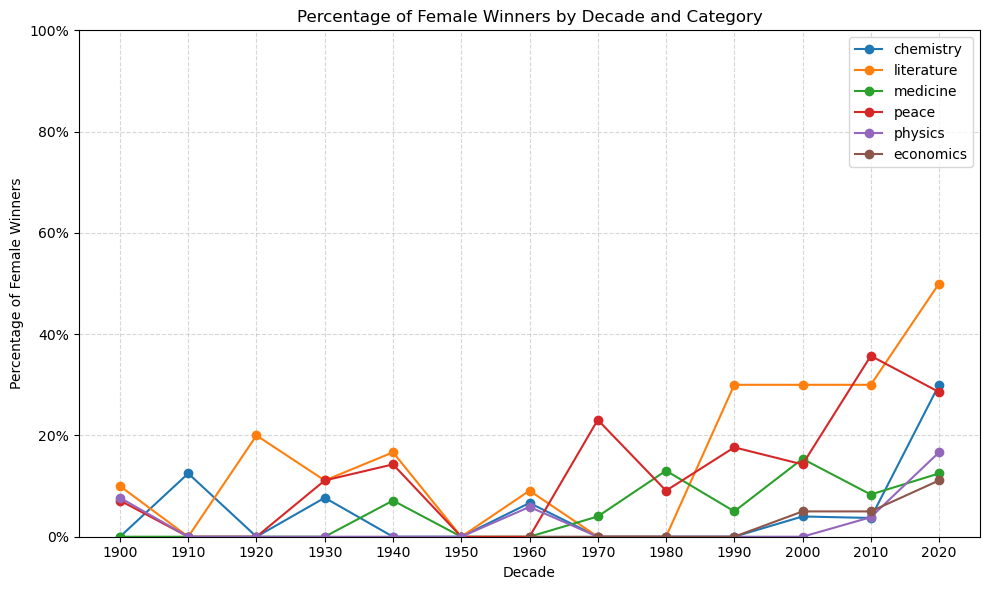

In [32]:
# Plot
plt.figure(figsize=(10, 6))

# Iterate through each unique category from the filtered DataFrame
for category in df_female['Category'].unique():
    # Extract data for the current category
    data = df_female[df_female['Category'] == category]
    # Plot the percentage of female winners per decade for each category
    plt.plot(data['decade'], data['fproportion'], label=category, marker='o')

plt.xlabel('Decade')   # Label the x-axis as 'Decade'
plt.ylabel('Percentage of Female Winners')  # Label the y-axis as 'Percentage of Female Winners'

plt.ylim(0, 1)

# Set the x-axis ticks to occur every decade from 1900 to 2020
plt.xticks(range(1900, 2021, 10))
# Customize y-axis ticks to show percentage labels
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], ['0%', '20%', '40%', '60%', '80%', '100%'])

plt.legend()
plt.title('Percentage of Female Winners by Decade and Category')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### Insight from Visualisation
- The graph depicts female Nobel Prize winners by category from different decades. 
- It shows an increase in the number of female recipients over the years, indicating progress towards gender diversity and equality in these prestigious awards.

#### QUERY 5: PERCENTAGE OF MALE LAUREATES OVER THE YEARS FOR EACH CATEGORY

This query calculates the percentage of male Nobel laureates by prize category over the decades. It shows how the proportion of male laureates has changed in each category over time and offers insights into gender representation in various fields recognized by the Nobel Prizes.

In [33]:
# This script calculates and displays the percentage of male Nobel Prize winners by decade and category.

# Execute SQL query to compute the proportion of male winners by decade and category
cursor.execute('''
SELECT CAST((Year / 10) * 10 AS INTEGER) AS decade, Category,
       AVG(CASE WHEN gender = 'male' THEN 1 ELSE 0 END) AS mproportion
FROM (
    SELECT Year, Category, gender
    FROM Prizes
    JOIN Laureates ON Prizes.laureate_id1 = Laureates.id
                   OR Prizes.laureate_id2 = Laureates.id
                   OR Prizes.laureate_id3 = Laureates.id
)
GROUP BY decade, Category;
''')

results = cursor.fetchall()

# Create a DataFrame from the fetched rows with specific column names
df = pd.DataFrame(results, columns=['decade', 'Category', 'mproportion'])

# Filter out rows where the proportion of male winners is not calculated (null values)
df_male = df[df['mproportion'].notnull()]

# Display the DataFrame which shows the percentage of male winners by decade and category
print("Percentage of Male Winners by Decade and Category")
df_male  

Percentage of Male Winners by Decade and Category


,decade,Category,mproportion
0,1900,chemistry,1.000000
1,1900,literature,0.900000
2,1900,medicine,1.000000
3,1900,peace,0.857143
4,1900,physics,0.923077
...,...,...,...
67,2020,economics,0.888889
68,2020,literature,0.500000
69,2020,medicine,0.875000
70,2020,peace,0.285714


#### Query 5: Visualisation

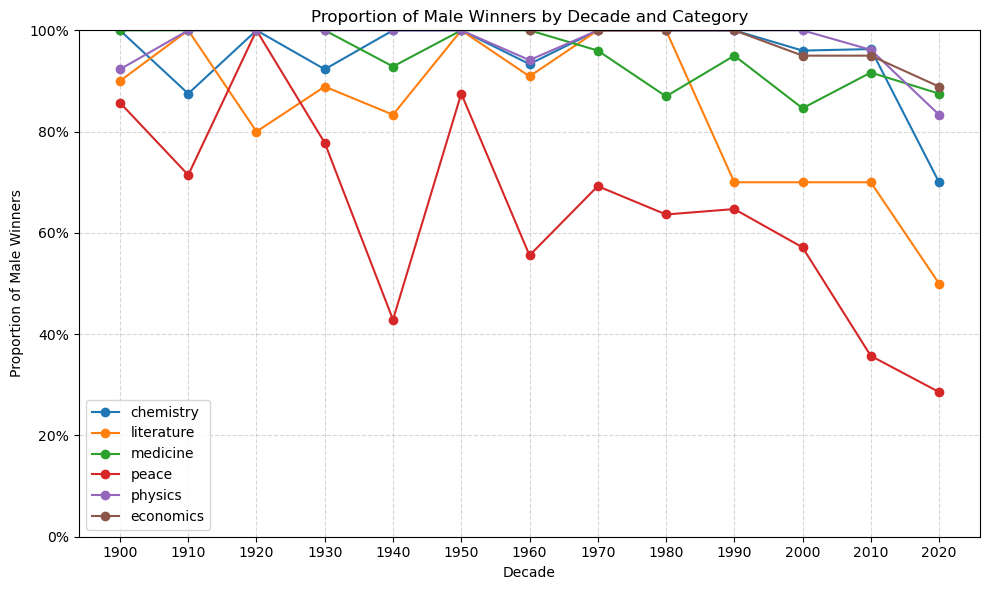

In [34]:
# Plot
plt.figure(figsize=(10, 6))

# Iterate through each unique category found in the filtered DataFrame
for category in df_male['Category'].unique():
    # Filter data for the current category from the DataFrame
    data = df_male[df_male['Category'] == category]
    # Create a line plot for the proportion of male winners per decade for each category
    plt.plot(data['decade'], data['mproportion'], label=category, marker='o')


plt.xlabel('Decade')  # Label the x-axis as 'Decade'
plt.ylabel('Proportion of Male Winners')  # Label the y-axis as 'Proportion of Male Winners'


plt.ylim(0, 1)
# Set the x-axis ticks to occur every decade from 1900 to 2020
plt.xticks(range(1900, 2021, 10))
# Customize y-axis ticks to show percentage labels
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], ['0%', '20%', '40%', '60%', '80%', '100%'])

plt.legend()
plt.title('Proportion of Male Winners by Decade and Category')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### Insight from Visualisation
- The line graph displays the percentage of male Nobel Prize winners in different categories per decade from 1900 to 2020. 
- It highlights gender inequality in these awards throughout the 20th and early 21st centuries, with male recipients consistently outnumbering female recipients across all categories.

#### QUERY 6: TREND ANALYSIS FOR BOTH MALE AND FEMALE LAUREATES

This query calculates the percentage of male and female Nobel laureates for each prize category over the decades. Analyzing the changes in gender proportions in each category can offer insights into the evolving landscape of gender representation in various fields recognized by the Nobel Prizes.

In [35]:
# Query to retrieve the count of Nobel laureates by year and gender,
# then load the results into a DataFrame for visualization.

# Query that fetches the year, gender, and count of laureates from the Prizes and Laureates tables
query = '''
SELECT p.year, l.gender, COUNT(l.id) as count
FROM Prizes p
JOIN Laureates l ON p.laureate_id1 = l.id OR p.laureate_id2 = l.id OR p.laureate_id3 = l.id
WHERE l.gender IS NOT NULL  
GROUP BY p.year, l.gender  
ORDER BY p.year  
'''
# Execute the SQL query using a database connection and fetch the results directly into a pandas DataFrame
df = pd.read_sql_query(query, conn)

In [36]:
# This script transforms the DataFrame into a pivot table to analyze gender distribution of Nobel laureates over the years.

# Pivot the DataFrame to organize the data with years as rows and genders as columns
pivot_df = df.pivot_table(index='year', columns='gender', values='count', aggfunc='sum', fill_value=0)

# Calculate the total number of laureates per year by summing across the gender columns
pivot_df['Total'] = pivot_df.sum(axis=1)

# Calculate the percentage of male laureates per year
pivot_df['Male %'] = (pivot_df['male'] / pivot_df['Total']) * 100

# Calculate the percentage of female laureates per year
pivot_df['Female %'] = (pivot_df['female'] / pivot_df['Total']) * 100

print("Gender Distribution: A Trend Analysis from 1901 to 1915")
pivot_df.head(15)

Gender Distribution: A Trend Analysis from 1901 to 1915


gender,female,male,org,Total,Male %,Female %
year,,,,,,
1901,0,6,0,6,100.000000,0.000000
1902,0,7,0,7,100.000000,0.000000
1903,1,6,0,7,85.714286,14.285714
1904,0,5,1,6,83.333333,0.000000
1905,1,4,0,5,80.000000,20.000000
1906,0,6,0,6,100.000000,0.000000
1907,0,6,0,6,100.000000,0.000000
1908,0,7,0,7,100.000000,0.000000
1909,1,6,0,7,85.714286,14.285714


In [37]:
print("Gender Distribution: A Trend Analysis from 2009 to 2023")
# Display the last 15 rows from 2009 to 2023
pivot_df.tail(15)

Gender Distribution: A Trend Analysis from 2009 to 2023


gender,female,male,org,Total,Male %,Female %
year,,,,,,
2009,5,8,0,13,61.538462,38.461538
2010,0,11,0,11,100.000000,0.000000
2011,3,10,0,13,76.923077,23.076923
2012,0,9,1,10,90.000000,0.000000
2013,1,11,1,13,84.615385,7.692308
2014,2,11,0,13,84.615385,15.384615
2015,2,8,1,11,72.727273,18.181818
2016,0,11,0,11,100.000000,0.000000
2017,0,11,1,12,91.666667,0.000000


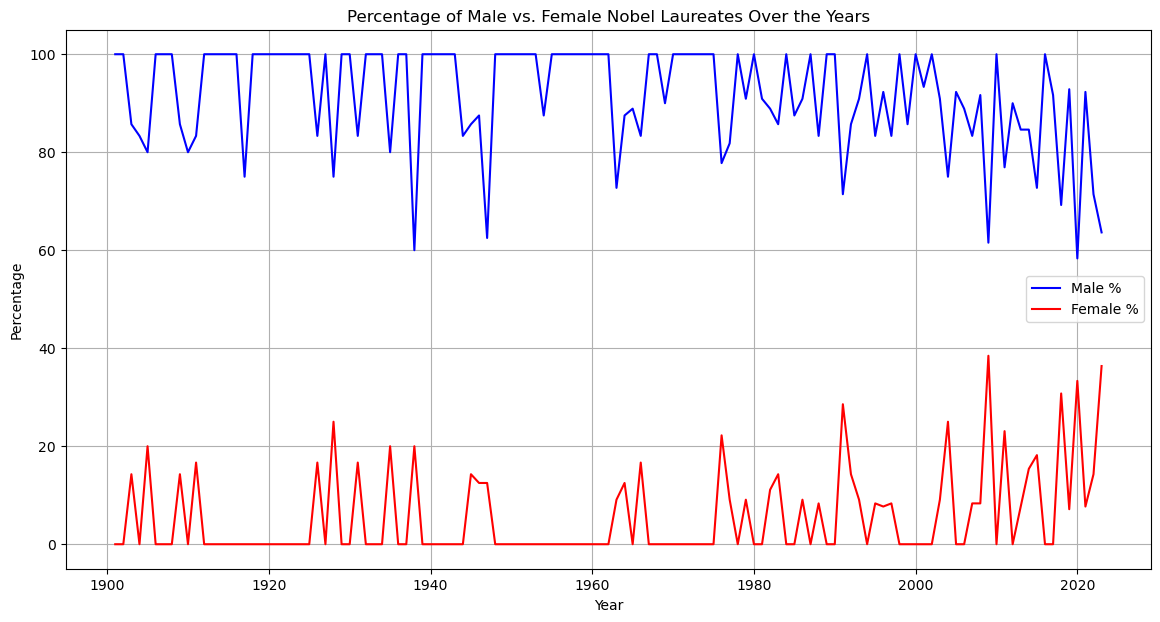

In [38]:
# To visualize trends in gender distribution.
plt.figure(figsize=(14, 7))

# Plot the percentage of male laureates over the years
plt.plot(pivot_df.index, pivot_df['Male %'], label='Male %', color='blue')

# Plot the percentage of female laureates over the years
plt.plot(pivot_df.index, pivot_df['Female %'], label='Female %', color='red')

# Add a title to the plot
plt.title('Percentage of Male vs. Female Nobel Laureates Over the Years')

# Label the x-axis as 'Year' and the y-axis as 'Percentage'
plt.xlabel('Year')
plt.ylabel('Percentage')

plt.legend()
plt.grid(True)
plt.show()

#### Insight from Visualisation
- The graph displays the percentage of male and female Nobel Laureates over time, revealing a significant gender gap. 
- This highlights the historical gender imbalance of Nobel Prize winners and prompts discussions on gender equality and representation in these prestigious awards. 
- It clearly shows that the number of male laureates is significantly higher than that of female laureates.

## SIGNIFICANT INDIVIDUAL ACHIEVEMENTS

There have been several remarkable individuals within the history of the Nobel Prize who have achieved outstanding accomplishments, leaving a lasting impression on this prestigious award. This particular section endeavors to highlight such winners, which include those who have been awarded multiple times, the youngest and oldest laureates, and First women laureates who have been recognized for their contributions. By conducting these analyses, the aim is to honor their exceptional accomplishments and milestones within the Nobel community, while also providing valuable insights for those interested in this esteemed field of academic and scientific excellence.

#### QUERY 7: NUMBER OF LAUREATES WHO WON MORE THAN ONE NOBEL PRIZE

This query finds Nobel Prize winners who have won more than once, indicating exceptional contributions to their field. Winning multiple Nobel Prizes is a rare and significant achievement, demonstrating sustained groundbreaking work.

In [39]:
# Query to identify laureates who have won more than one Nobel Prize.

cursor.execute('''
SELECT firstname, surname, prize_count
FROM (
    SELECT laureate_id, COUNT(*) AS prize_count  
    FROM (
        SELECT laureate_id1 AS laureate_id  
        FROM Prizes
        UNION ALL
        SELECT laureate_id2 AS laureate_id  
        FROM Prizes
        UNION ALL
        SELECT laureate_id3 AS laureate_id  
        FROM Prizes
    ) AS laureate_prizes  
    GROUP BY laureate_id  
    HAVING prize_count > 1  
) AS multi_winners  
JOIN Laureates ON multi_winners.laureate_id = Laureates.id  
''')

results = cursor.fetchall()

#### Query 7: Dataframe

In [40]:
columns = ["firstname", "surname", "prize_count"]
df = pd.DataFrame(results, columns=columns)
print("Laureates who won more than one Nobel Prize:")
df

Laureates who won more than one Nobel Prize:


,firstname,surname,prize_count
0,Marie,Curie,2
1,John,Bardeen,2
2,Linus,Pauling,2
3,Frederick,Sanger,2
4,International Committee of the Red Cross,None,3
5,Office of the United Nations High Commissioner...,None,2
6,Barry,Sharpless,2


#### Insight from Visualisation
- The image displays individuals and organizations who have won prestigious awards. 
- It emphasizes those who have won multiple awards, indicating exceptional contributions to their fields or consistent high-quality work/leadership.

#### QUERY 8: YOUNGEST NOBEL LAUREATES AGE, NAME, CATEGORY, AND YEAR THEY WON THE NOBEL PRIZE

This query selects the youngest Nobel laureates who won the prize below the age of 32. It retrieves their full name, age, the prize category, and the year it was awarded. The query highlights the outstanding achievements of young individuals and their significant contributions to their fields.

In [41]:
# Query to identify Nobel laureates who were younger than 32 when they won

cursor.execute('''
    SELECT Age_Laureate1 AS Age, 
           CASE WHEN firstname IS NOT NULL THEN firstname ELSE '' END || ' ' || 
           CASE WHEN surname IS NOT NULL THEN surname ELSE '' END AS Full_Name, 
           Prizes.year, 
           Prizes.category
    FROM Prizes
    JOIN Laureates ON Prizes.laureate_id1 = Laureates.id
    WHERE Age_Laureate1 IS NOT NULL AND Age_Laureate1 < 32 AND 
          firstname IS NOT NULL AND surname IS NOT NULL
    UNION
    SELECT Age_Laureate2 AS Age, 
           CASE WHEN firstname IS NOT NULL THEN firstname ELSE '' END || ' ' || 
           CASE WHEN surname IS NOT NULL THEN surname ELSE '' END AS Full_Name, 
           Prizes.year, 
           Prizes.category
    FROM Prizes
    JOIN Laureates ON Prizes.laureate_id2 = Laureates.id
    WHERE Age_Laureate2 IS NOT NULL AND Age_Laureate2 < 32 AND 
          firstname IS NOT NULL AND surname IS NOT NULL
    UNION
    SELECT Age_Laureate3 AS Age, 
           CASE WHEN firstname IS NOT NULL THEN firstname ELSE '' END || ' ' || 
           CASE WHEN surname IS NOT NULL THEN surname ELSE '' END AS Full_Name, 
           Prizes.year, 
           Prizes.category
    FROM Prizes
    JOIN Laureates ON Prizes.laureate_id3 = Laureates.id
    WHERE Age_Laureate3 IS NOT NULL AND Age_Laureate3 < 32 AND 
          firstname IS NOT NULL AND surname IS NOT NULL
''')
# The query pulls from three potential laureate positions (id1, id2, id3) in the Prizes table, checking each for age criteria.
# The UNION command is used to combine results from each subquery into a single list without duplicates.
# The CASE statements ensure that the fullname is neatly formatted, even if part of the name is missing.

results = cursor.fetchall()

#### Query 8: Dataframe

In [42]:
df = pd.DataFrame(results, columns=['Age', 'Full Name', 'Year', 'Category'])
print("Youngest Nobel Laureates")
df

Youngest Nobel Laureates


,Age,Full Name,Year,Category
0,17,Malala Yousafzai,2014,peace
1,25,Lawrence Bragg,1915,physics
2,31,Carl D. Anderson,1936,physics
3,31,Paul A.M. Dirac,1933,physics
4,31,Tsung-Dao Lee,1957,physics
5,31,Werner Heisenberg,1932,physics


#### Insight from Visualisation
- The table displays Nobel Prize winners' names, ages, award years, and prize categories, with a focus on young achievers who have been honored with this prestigious recognition.

#### QUERY 9: OLDEST NOBEL LAUREATE'S AGE, NAME, CATEGORY, AND YEAR THEY WON THE NOBEL PRIZE

This query searches for Nobel laureates who received the prize at the age of 86 or older. It highlights the outstanding accomplishments of older individuals who made significant contributions to their fields in their later years. This challenges the common belief that productivity and creativity decline with age.

In [43]:
# Query to fetch details of laureates who were older than 85 when they won
cursor.execute('''
    SELECT Age_Laureate1 AS Age, 
           CASE WHEN firstname IS NOT NULL THEN firstname ELSE '' END || ' ' || 
           CASE WHEN surname IS NOT NULL THEN surname ELSE '' END AS Full_Name, 
           Prizes.year, 
           Prizes.category
    FROM Prizes
    JOIN Laureates ON Prizes.laureate_id1 = Laureates.id
    WHERE Age_Laureate1 IS NOT NULL AND Age_Laureate1 > 85 AND 
          firstname IS NOT NULL AND surname IS NOT NULL
    UNION
    SELECT Age_Laureate2 AS Age, 
           CASE WHEN firstname IS NOT NULL THEN firstname ELSE '' END || ' ' || 
           CASE WHEN surname IS NOT NULL THEN surname ELSE '' END AS Full_Name, 
           Prizes.year, 
           Prizes.category
    FROM Prizes
    JOIN Laureates ON Prizes.laureate_id2 = Laureates.id
    WHERE Age_Laureate2 IS NOT NULL AND Age_Laureate2 > 85 AND 
          firstname IS NOT NULL AND surname IS NOT NULL
    UNION
    SELECT Age_Laureate3 AS Age, 
           CASE WHEN firstname IS NOT NULL THEN firstname ELSE '' END || ' ' || 
           CASE WHEN surname IS NOT NULL THEN surname ELSE '' END AS Full_Name, 
           Prizes.year, 
           Prizes.category
    FROM Prizes
    JOIN Laureates ON Prizes.laureate_id3 = Laureates.id
    WHERE Age_Laureate3 IS NOT NULL AND Age_Laureate3 > 85 AND 
          firstname IS NOT NULL AND surname IS NOT NULL
''')
# The query checks each of the three potential laureate positions (id1, id2, id3) in the Prizes table,
# ensuring each one meets the age criteria.
# The UNION command is used to combine results from each condition into a single list without duplicates.
# The CASE statements are used to construct the full name, ensuring it is properly formatted even if some parts are missing.

results = cursor.fetchall()

#### Query 9: Dataframe

In [44]:
df = pd.DataFrame(results, columns=['Age', 'Full Name', 'Year', 'Category'])
print("Oldest Nobel Laureates")
df

Oldest Nobel Laureates


,Age,Full Name,Year,Category
0,86,Ferdinand Buisson,1927,peace
1,87,Joseph Rotblat,1995,peace
2,87,Karl von Frisch,1973,medicine
3,87,Peyton Rous,1966,medicine
4,87,Vitaly L. Ginzburg,2003,physics
5,87,Yoichiro Nambu,2008,physics
6,88,Doris Lessing,2007,literature
7,88,Raymond Davis Jr.,2002,physics
8,89,Lloyd S. Shapley,2012,economics
9,89,Roger Penrose,2020,physics


#### Insight from Visualisation
- The image shows a table with the names of Nobel Prize winners who received the award at an older age, along with the year and category they won. 
- This illustrates that noteworthy achievements can be acknowledged at any age.

#### QUERY 10: FIRST FEMALE LAUREATE'S AGE, NAME, CATEGORY, AND YEAR THEY WON THE NOBEL PRIZE

This query finds the first female laureates to win a Nobel Prize in each category and displays their name, country of birth, category, and year of winning. It marks the historical achievements of women by identifying the breakthroughs made in each category.

In [45]:
# Query to fetch details of the first female winners in each Nobel Prize category
cursor.execute('''
    SELECT MIN(p.year) AS Year,  
           l.firstname || ' ' || l.surname AS Full_Name,  
           p.category AS Category,  
           l.bornCountry AS Birth_Country  
    FROM Prizes p
    JOIN Laureates l ON (p.laureate_id1 = l.id OR p.laureate_id2 = l.id OR p.laureate_id3 = l.id)
    WHERE l.gender = 'female'  
    GROUP BY p.category  
    ORDER BY MIN(p.year) ASC  
''')
# The query includes conditions to check all possible laureate ID fields (id1, id2, id3) in the Prizes table.
# It uses GROUP BY to organize data by category and MIN to determine the earliest year of an award.

results = cursor.fetchall()

#### Query 10: Dataframe 

In [46]:
df = pd.DataFrame(results, columns=['Year', 'Full Name', 'Category', 'Birth Country'])
print("First Females to win Nobel Prize in each category")
df

First Females to win Nobel Prize in each category


,Year,Full Name,Category,Birth Country
0,1903,Marie Curie,physics,Russian Empire (now Poland)
1,1905,Bertha von Suttner,peace,Austrian Empire (now Czech Republic)
2,1909,Selma Lagerlöf,literature,Sweden
3,1911,Marie Curie,chemistry,Russian Empire (now Poland)
4,1947,Gerty Cori,medicine,Austria-Hungary (now Czech Republic)
5,2009,Elinor Ostrom,economics,USA


#### Insight from Visualisation
- This chart displays the female laureates who won the Nobel Prize first, along with their birth countries, winning years and categories. 
- The birth countries exhibit that women from across the globe have made significant contributions to science, literature, and peace. 
- The variety of categories indicates the different areas where women have excelled. 
- The years of the prizes presented offer a timeline of when women's achievements were more prominently recognized.

## GEOGRAPHICAL DISTRIBUTION OF AWARDS

This section deals with the geographical aspects of the Nobel Prizes, indicating the countries and cities that have produced the highest number of laureates. By studying the birthplaces of laureates and the locations associated with Nobel accomplishments, one can identify trends in scientific and intellectual hubs worldwide. Such analyses can offer insights into global scientific excellence and help to recognize the significant contributors to the scientific community.

#### QUERY 11: TOP 10 COUNTRIES WITH THE MOST NOBEL PRIZES BY BIRTH COUNTRY OF LAUREATES

This query identifies and lists the top 10 countries with the most Nobel Prize laureates born in them. The aim is to understand which nations have historically produced the most laureates, reflecting their educational and cultural richness and contributions to global knowledge and innovation.

In [47]:
# Query to fetch the count of Nobel Prizes won by laureates from each birth country
cursor.execute('''
SELECT L.bornCountry AS Birth_Country, COUNT(*) AS Prize_Count
FROM Prizes AS P
JOIN Laureates AS L ON L.id IN (P.laureate_id1, P.laureate_id2, P.laureate_id3) 
WHERE L.bornCountry IS NOT NULL  
GROUP BY L.bornCountry  
ORDER BY Prize_Count DESC  
LIMIT 10  
''')
# The query joins the Prizes and Laureates tables to match laureate IDs with their prize records, counting prizes per birth country.

results = cursor.fetchall()

df = pd.DataFrame(results, columns=['Birth Country', 'Prize Count'])
df.sort_values('Prize Count', ascending=False, inplace=True)
print("Top 10 countries that won most of the Nobel Prize")
df

Top 10 countries that won most of the Nobel Prize


,Birth Country,Prize Count
0,USA,292
1,United Kingdom,90
2,Germany,67
3,France,58
4,Sweden,30
5,Japan,28
6,Canada,21
7,the Netherlands,19
8,Switzerland,19
9,Russia,18


#### Query 11: Visualisation 

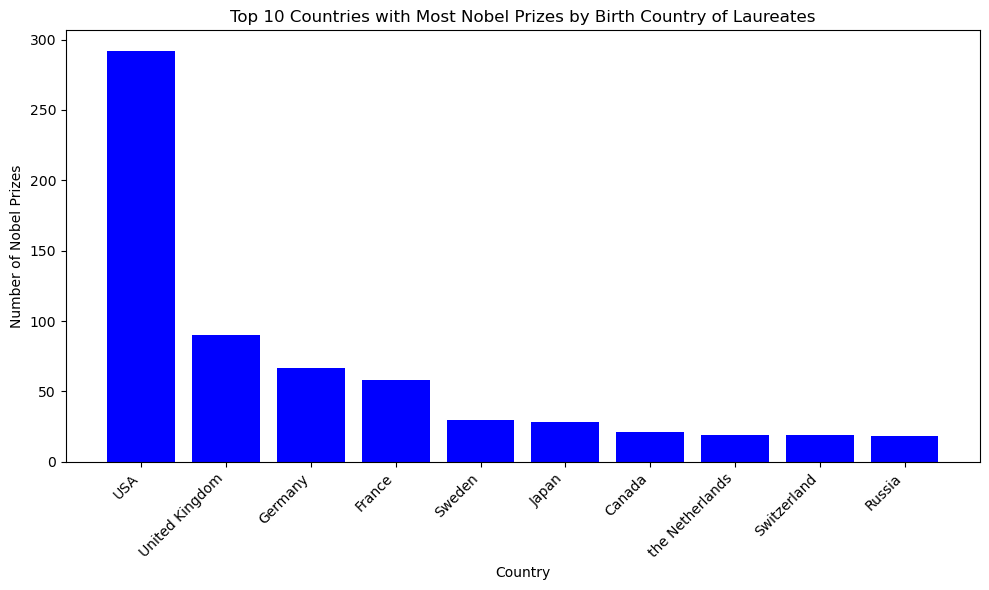

In [48]:
plt.figure(figsize=(10, 6))
plt.bar(df['Birth Country'], df['Prize Count'], color='blue')

plt.xlabel('Country')  # Label the x-axis as 'Country'
plt.ylabel('Number of Nobel Prizes')  # Label the y-axis as 'Number of Nobel Prizes'
plt.title('Top 10 Countries with Most Nobel Prizes by Birth Country of Laureates')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Insight from Visualisation
- The USA leads in the number of Nobel Prize winners, followed by European countries like the UK, Germany, and France. 
- This could be attributed to the strong academic and research infrastructure and funding for innovation in the USA, while European countries reflect their historical and ongoing contributions to science and literature.

#### QUERY 12: TOP 10 BIRTH CITY OF LAUREATES

This query identifies the top 10 birth cities of Nobel laureates based on the number of laureates born in each city. The list reveals cultural and educational hubs that have historically nurtured individuals who went on to achieve Nobel Prizes. This suggests the presence of robust educational systems, vibrant intellectual communities, or other supportive factors conducive to high achievement.

In [49]:
# Query to fetch the count of Nobel Prizes associated with each laureate's birth city
cursor.execute('''
SELECT L.bornCity AS Birth_City, COUNT(*) AS Prize_Count
FROM Prizes AS P
JOIN Laureates AS L ON L.id IN (P.laureate_id1, P.laureate_id2, P.laureate_id3)
WHERE L.bornCity IS NOT NULL  
GROUP BY L.bornCity  
ORDER BY Prize_Count DESC  
LIMIT 10  
''')
# The query joins the Prizes and Laureates tables to match laureate IDs with their prize records, counting prizes per birth city.

results = cursor.fetchall()

df = pd.DataFrame(results, columns=['Birth City', 'Prize Count'])
df.sort_values('Prize Count', ascending=False, inplace=True)
print("Top 10 Birth City of Nobel Prize Winners")
df

Top 10 Birth City of Nobel Prize Winners


,Birth City,Prize Count
0,"New York, NY",55
1,Paris,28
2,London,19
3,Vienna,14
4,"Chicago, IL",13
5,Berlin,11
6,"Boston, MA",9
7,"Washington, D.C.",8
8,Budapest,8
9,"Brooklyn, NY",8


#### Query 12: Visualisation 

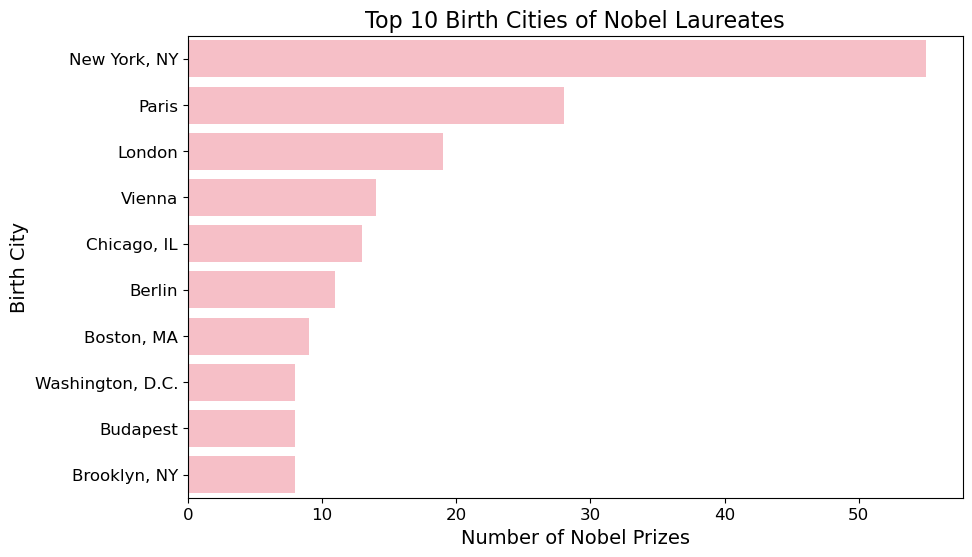

In [50]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Prize Count', y='Birth City', data=df, color='lightpink')
plt.title('Top 10 Birth Cities of Nobel Laureates', fontsize=16)

# Label the x-axis and y-axis with a specific font size for clarity
plt.xlabel('Number of Nobel Prizes', fontsize=14)
plt.ylabel('Birth City', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

#### Insight from Visualisation
- The bar chart displays the top 10 birth cities of Nobel Laureates, led by New York, NY. 
- This concentration of laureates in certain cities may indicate regions with strong educational institutions, research facilities, and intellectual communities that foster Nobel-worthy work. 
- Other cities from around US and Europe also appear, reflecting the international diversity of the laureates.

#### QUERY 13: TOP 10 COUNTRIES THAT WON NOBEL PRIZES FOR PEACE

This query aims to identify the top 10 countries with the most Nobel Peace Prize laureates by their country of birth. It focuses on the Peace category to show which nations have historically produced individuals or organizations that have made significant contributions to global peace efforts. The list generated by this query highlights countries whose natives have made significant contributions to peace efforts worldwide.

In [51]:
# Query to fetch the count of Nobel Peace Prizes won by each country
cursor.execute('''
SELECT L.bornCountry AS region,  
COUNT(*) AS value  
FROM Prizes AS P
JOIN Laureates AS L ON L.id IN (P.laureate_id1, P.laureate_id2, P.laureate_id3)  
WHERE P.category = 'peace'  
AND L.bornCountry IS NOT NULL  
AND L.bornCountry != ''  
GROUP BY L.bornCountry  
ORDER BY value DESC  
LIMIT 10  
''')
# The query identifies the number of Nobel Peace Prizes each country has won, focusing only on non-null and non-empty country values.

results = cursor.fetchall()
df = pd.DataFrame(results, columns=['Country', 'Nobel Peace Prizes'])
df.sort_values('Nobel Peace Prizes', ascending=False, inplace=True)
print("Top 10 Countries that won Nobel Prizes for Peace")
df

Top 10 Countries that won Nobel Prizes for Peace


,Country,Nobel Peace Prizes
0,USA,19
1,France,9
2,United Kingdom,5
3,Sweden,5
4,Germany,5
5,Northern Ireland,4
6,Switzerland,3
7,South Africa,3
8,Egypt,3
9,Belgium,3


#### Query 13: Visualisation 

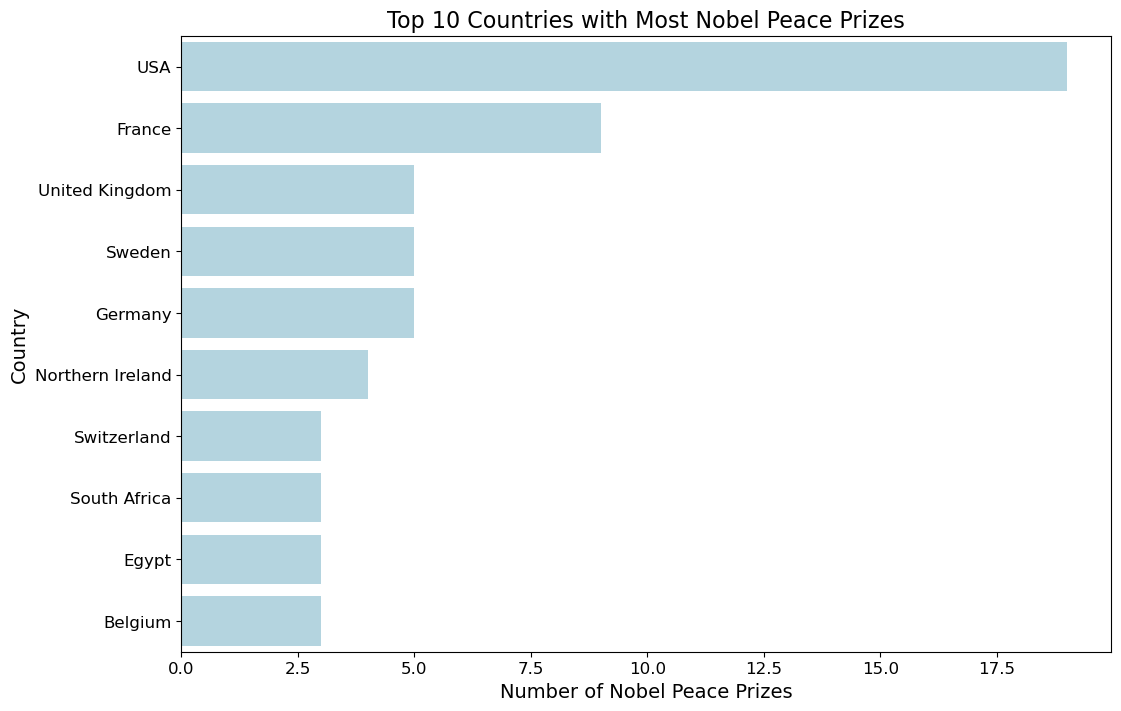

In [52]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Nobel Peace Prizes', y='Country', data=df, color='lightblue')
plt.title('Top 10 Countries with Most Nobel Peace Prizes', fontsize=16)

plt.xlabel('Number of Nobel Peace Prizes', fontsize=14)
plt.ylabel('Country', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

#### Insight from Visualisation
- The bar chart reveals that the USA has won the most Nobel Peace Prizes, followed by France and Germany. 
- It reflects the contribution of these countries towards global peace efforts. 
- The chart suggests that the USA has a long history of involvement in international peace processes and initiatives, while France and Germany demonstrate Europe's strong commitment to peace and diplomacy. 
- The Nobel Committee's recognition of peace efforts worldwide is evident from the inclusion of countries from different continents on the list.

#### QUERY 14: TOP 10 COUNTRIES THAT GOT THE NOBEL PRIZE FOR MEDICINE

This query lists the top 10 countries with the most Nobel Prizes in Medicine awarded to their born laureates. It shows the geographical distribution of contributions to medical sciences recognized by the Nobel Committee and highlights global leaders in medical research and innovation. These countries likely have strong institutions, research funding, and educational systems promoting advanced studies in medicine and related fields.

In [53]:
# Query to select the top 10 countries based on the number of Nobel Prizes won in the field of Medicine
cursor.execute('''
SELECT  L.bornCountry AS region,  
COUNT(*) AS value  
FROM Prizes AS P  
JOIN Laureates AS L ON L.id IN (P.laureate_id1, P.laureate_id2, P.laureate_id3)  
WHERE P.category = 'medicine'  
 AND L.bornCountry IS NOT NULL  
AND L.bornCountry != ''  
GROUP BY L.bornCountry  
ORDER BY value DESC  
LIMIT 10; 
''')

results = cursor.fetchall()
df = pd.DataFrame(results, columns=['Country', 'Nobel Prizes for Medicine'])
df.sort_values('Nobel Prizes for Medicine', ascending=False, inplace=True)
print("Top 10 Countries that won Nobel Prizes for Medicine")
df

Top 10 Countries that won Nobel Prizes for Medicine


,Country,Nobel Prizes for Medicine
0,USA,80
1,United Kingdom,25
2,Germany,16
3,France,12
4,Sweden,8
5,Australia,7
6,Switzerland,6
7,Japan,5
8,Italy,5
9,Austria,5


#### Query 14: Visualisation 

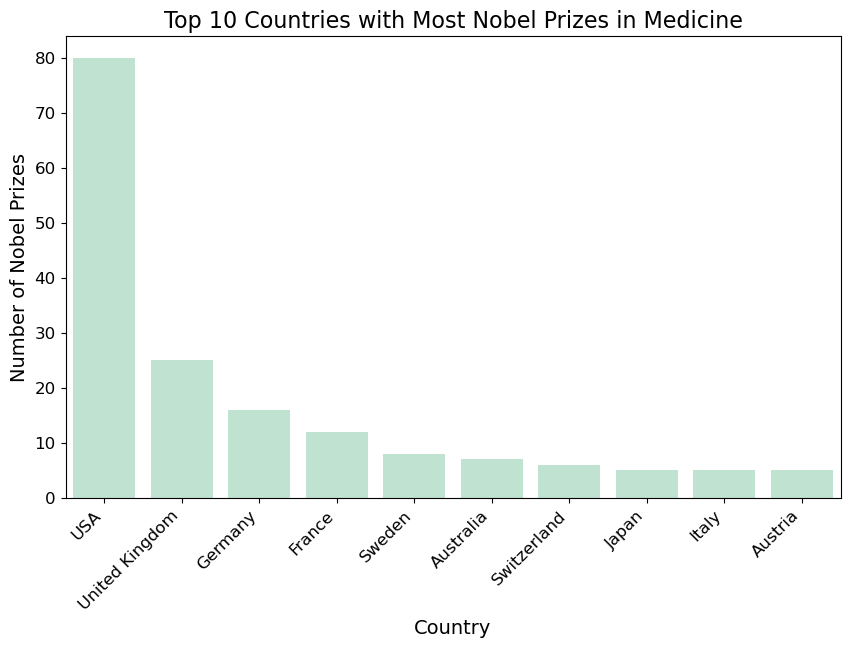

In [54]:
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Nobel Prizes for Medicine', data=df, color='#bae8d1')

plt.title('Top 10 Countries with Most Nobel Prizes in Medicine', fontsize=16)  
plt.xlabel('Country', fontsize=14)  
plt.ylabel('Number of Nobel Prizes', fontsize=14)  

plt.xticks(rotation=45, ha='right', fontsize=12)  
plt.yticks(fontsize=12)  

plt.show()

#### Insight from Visualisation
- The top 10 countries with the most Nobel Prizes in Medicine are showcased in a bar chart, with the USA leading by a significant margin. 
- This indicates a strong infrastructure for medical research and innovation, possibly driven by investment in healthcare, education, and research institutions. 
- European countries are also prominent on the list, reflecting their historical and ongoing contributions to medical science.

## INSTITUTIONAL AND GEOGRAPHIC IMPACT

The final section of this analysis explores the connections between institutions and their locations. Identifying the organizations and cities with frequent laureates can help to understand which institutions and regions have significant impacts on the fields recognized by the Nobel committees.

#### QUERY 15: TOP 10 AFFILIATED ORGANIZATIONS THAT WON NOBEL PRIZES

This query finds the top 10 organizations affiliated with Nobel Prize winners based on the number of laureates associated with them. It shows organizations that have made significant contributions to Nobel Prize-recognized fields.

In [55]:
# Query to find the top 10 affiliations based on the number of Nobel Prizes awarded
query = """
SELECT affiliation_name, COUNT(*) AS prize_count  
FROM (
    SELECT laureate_id1_affiliation_name AS affiliation_name  
    FROM Prizes
    WHERE laureate_id1_affiliation_name IS NOT NULL AND  
          laureate_id1_affiliation_name != '' AND  
          laureate_id1_affiliation_name NOT IN ('None', 'Unknown')  
    UNION ALL  
    SELECT laureate_id2_affiliation_name AS affiliation_name  
    FROM Prizes
    WHERE laureate_id2_affiliation_name IS NOT NULL AND
          laureate_id2_affiliation_name != '' AND
          laureate_id2_affiliation_name NOT IN ('None', 'Unknown')
    UNION ALL 
    SELECT laureate_id3_affiliation_name AS affiliation_name  
    FROM Prizes
    WHERE laureate_id3_affiliation_name IS NOT NULL AND
          laureate_id3_affiliation_name != '' AND
          laureate_id3_affiliation_name NOT IN ('None', 'Unknown')
) AS combined  
GROUP BY affiliation_name  
ORDER BY prize_count DESC  
LIMIT 10;  
"""

cursor.execute(query)
results = cursor.fetchall()

#### Query 15: Visualisation Dataframe

In [56]:
df = pd.DataFrame(results, columns=['Affiliation Name', 'Prize Count'])  
print("Top 10 Affiliations that won Nobel Prizes:")
df

Top 10 Affiliations that won Nobel Prizes:


,Affiliation Name,Prize Count
0,University of California,36
1,Harvard University,28
2,Massachusetts Institute of Technology (MIT),23
3,Stanford University,22
4,University of Chicago,19
5,California Institute of Technology (Caltech),19
6,University of Cambridge,18
7,Columbia University,18
8,Princeton University,17
9,Rockefeller University,13


#### Insight from Visualisation
- The University of California has the highest number of Nobel Prize affiliations at 36. This indicates a strong culture of research and innovation within the institution. 
- Understanding the factors that contribute to an institution’s success in producing Nobel Laureates, such as research funding, faculty quality, and collaborative networks, can be useful.

#### QUERY 16: TOP 10 CITIES OF THE AFFILIATIONS THAT WON THE MOST NOBEL PRIZES

The query aims to rank the top 10 cities based on the number of Nobel Prizes associated with institutions in these cities. This helps to identify regions that have become centers of excellence and innovation, attracting, or cultivating talent that leads to significant contributions recognized by Nobel Prizes. The cities identified by the query can be considered global centers of excellence with top-notch educational and research institutions.

In [57]:
# Query to find the top 10 cities with the most Nobel Prizes
query = """
SELECT
    affiliation_city,  
    COUNT(*) AS prize_count  
FROM (
    SELECT laureate_id1_affiliation_city AS affiliation_city  
    FROM Prizes
    WHERE laureate_id1_affiliation_city IS NOT NULL AND TRIM(laureate_id1_affiliation_city) != '' AND laureate_id1_affiliation_city NOT IN ('None', 'Unknown')
    UNION ALL  
    SELECT laureate_id2_affiliation_city  
    FROM Prizes
    WHERE laureate_id2_affiliation_city IS NOT NULL AND TRIM(laureate_id2_affiliation_city) != '' AND laureate_id2_affiliation_city NOT IN ('None', 'Unknown')
    UNION ALL  
    SELECT laureate_id3_affiliation_city  
    FROM Prizes
    WHERE laureate_id3_affiliation_city IS NOT NULL AND TRIM(laureate_id3_affiliation_city) != '' AND laureate_id3_affiliation_city NOT IN ('None', 'Unknown')
) AS cities  
GROUP BY affiliation_city  
ORDER BY prize_count DESC  
LIMIT 10;  
"""
cursor.execute(query)
results = cursor.fetchall()

#### Query 16: Visualisation Dataframe

In [58]:
df = pd.DataFrame(results, columns=['City', 'Prize Count'])  
print("Top 10 Affiliation's Cities that won Nobel Prizes:")
df 

Top 10 Affiliation's Cities that won Nobel Prizes:


,City,Prize Count
0,"Cambridge, MA",54
1,"New York, NY",45
2,Cambridge,31
3,Paris,27
4,London,27
5,"Stanford, CA",26
6,"Princeton, NJ",21
7,"Chicago, IL",21
8,"Berkeley, CA",21
9,"Pasadena, CA",19


#### Insight from Visualisation
- This is a compilation of the top 10 cities that have produced the most Nobel Prize winners based on their affiliation. 
- The list showcases the significant contribution made by these cities in producing Nobel laureates, which could be attributed to their leading universities, research institutions, and intellectual communities that provide the necessary support for innovative work. 